In [2]:
!pip install tensorflow==2.5.0 opencv-python mediapipe sklearn matplotlib --user

In [3]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [4]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

In [5]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #COLOR CONVERSTION BGR -> RGB
    image.flags.writeable = False # Image is no longer writeable
    results = model.process(image) # Make prediction
    image.flags.writeable = True   #Image is now writeblae
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR CONVERSION RBG -> BGR
    return image, results

In [6]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [7]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
                              mp_drawing.DrawingSpec(color=(80,110,10), thickness=1,circle_radius=1),
                              mp_drawing.DrawingSpec(color=(80,110,10), thickness=1,circle_radius=1)
                             )
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(80,22,10), thickness=2,circle_radius=4),
                              mp_drawing.DrawingSpec(color=(80,44,121), thickness=2,circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(121,22,76), thickness=2,circle_radius=4),
                              mp_drawing.DrawingSpec(color=(121,44,250), thickness=2,circle_radius=2)
                             ) 
    # Draw right hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(245,117,66), thickness=2,circle_radius=4),
                              mp_drawing.DrawingSpec(color=(245,66,230), thickness=2,circle_radius=2)
                             ) 

In [8]:
mp_holistic.POSE_CONNECTIONS

frozenset({(0, 1),
           (0, 4),
           (1, 2),
           (2, 3),
           (3, 7),
           (4, 5),
           (5, 6),
           (6, 8),
           (9, 10),
           (11, 12),
           (11, 13),
           (11, 23),
           (12, 14),
           (12, 24),
           (13, 15),
           (14, 16),
           (15, 17),
           (15, 19),
           (15, 21),
           (16, 18),
           (16, 20),
           (16, 22),
           (17, 19),
           (18, 20),
           (23, 24),
           (23, 25),
           (24, 26),
           (25, 27),
           (26, 28),
           (27, 29),
           (27, 31),
           (28, 30),
           (28, 32),
           (29, 31),
           (30, 32)})

In [53]:
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)
        # Break gracefullyq
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
        # Add a small delay
        cv2.waitKey(1)

    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [10]:
len(results.pose_landmarks.landmark)

33

In [11]:
draw_landmarks(frame, results)

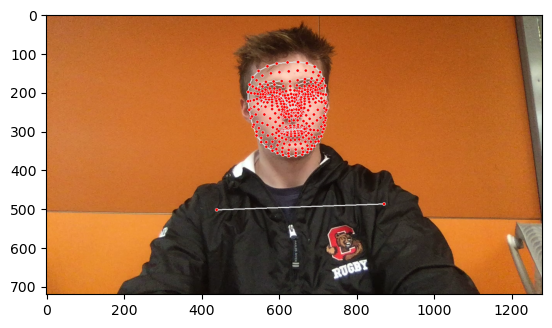

In [12]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [13]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [14]:
def extract_keypoints(results):
    pose = np.zeros(33*4)
    if results.pose_landmarks:
        pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten()
    
    lh = np.zeros(21*3)
    if results.left_hand_landmarks:
        lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() 
    
    rh = np.zeros(21*3)
    if results.right_hand_landmarks:
        rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() 
    
    face = np.zeros(468*3)
    if results.face_landmarks:
        face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() 
    
    return np.concatenate([pose, face, lh, rh])

In [15]:
results_test = extract_keypoints(results)[:-10]

In [16]:
results_test

array([ 0.49562865,  0.3440142 , -0.54243195, ...,  0.        ,
        0.        ,  0.        ])

In [17]:
np.save('0',results_test)

# 4. Setup Folders for Collection

Action detection: A key difference between action detection and other computer vision tasks is that a sequence of data rather than a single frame is used for detection. In this case, we are collecting data for 3 different actions multiplied by 30 frames multipled by the number of sequences/videos.

In [19]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data')

print(os.path)

# Actions that we try to detect
actions = np.array(['hello', 'thanks','iloveyou'])

# Thirty videos worth of data 
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

start_folder = 0

<module 'posixpath' from '/Users/jacksoncamp/opt/anaconda3/lib/python3.9/posixpath.py'>


In [20]:
for action in actions: 
    for sequence in range(no_sequences):
            try:
                os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
            except:
                pass

# 5. Collect Keypoint Values for Training and Testing

In [57]:
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    # Loop through actions
    for action in actions:
        # Loop through sequences/videos
        for sequence in range(no_sequences):
            # Loop through frames in sequence
            for frame_num in range(sequence_length):
                   
                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
                print(results)

                # Draw landmarks
                draw_landmarks(image, results)
                
                # Collection breaks: having breaks between each sequence collection allows to reset and reposition
                # yourself to collect action from start to finish
               
                # NEW Apply wait logic
                if frame_num == 0:
                    # FIX this so STARTING COLLECTION text stays for longer
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                                cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1, cv2.LINE_AA)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1, cv2.LINE_AA)
                
                # Now we extract the keypoints and save it to the given action-frame folder!
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)
                
                # Show to screen
                cv2.imshow('OpenCV Feed', image)
                
                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                # Add a small delay
                cv2.waitKey(1)

    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

KeyboardInterrupt: 

# 6. Preprocess Data and Create Labels and Features

In [22]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [23]:
label_map = {label:num for num, label in enumerate(actions)}

In [24]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [25]:
sequences, labels = [], []

# Going through all actions and all videos and going through the features and labels data for each one and 
# concatenating it into one big array
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])
print(labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [26]:
np.array(sequences).shape

(90, 30, 1662)

In [27]:
np.array(labels).shape

(90,)

In [28]:
X = np.array(sequences)

In [29]:
X.shape

(90, 30, 1662)

In [30]:
y = to_categorical(labels).astype(int)

In [31]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.05)

In [33]:
X_train.shape
X_train

array([[[ 0.51600802,  0.4074958 , -0.36146566, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.51245344,  0.40802422, -0.40116525, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.51125544,  0.40820101, -0.40848833, ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.50708205,  0.40820727, -0.33890489, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.50707686,  0.40808076, -0.32986504, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.50719774,  0.40756053, -0.32668871, ...,  0.        ,
          0.        ,  0.        ]],

       [[ 0.51431268,  0.39042053, -0.5243392 , ...,  0.16679624,
          0.19399732, -0.06301725],
        [ 0.51271152,  0.39827055, -0.58873171, ...,  0.43288359,
          0.30371115, -0.04166363],
        [ 0.51131618,  0.40272945, -0.57602251, ...,  0.43232232,
          0.30162784, -0.03400756],
        ...,
        [ 0.50940204,  0.3891705 , -0.50991333, ...,  

In [34]:
X_test.shape

(5, 30, 1662)

# 7. Build and Train LSTM Neural Network

In [35]:
# Builds sequential neural network 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping


In [36]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

2023-05-17 13:19:52.462643: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2023-05-17 13:19:52.462666: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2023-05-17 13:19:52.463057: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.


In [37]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

2023-05-17 13:20:05.142448: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Reason for Mediapipe + LSTM layers. State of the art models out there follow a number of CNN layers and then a number of LSTM layers. Less data required. Faster to train (much denser neural network). Only 500k parameters. Because NN was faster it is also faster for live detections

In [38]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [39]:
model.fit(X_train, y_train, epochs=500, callbacks=[tb_callback])

2023-05-17 13:20:10.501659: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/500
2/3 [===================>..........] - ETA: 0s - loss: 1.0767 - categorical_accuracy: 0.4375

2023-05-17 13:20:15.524708: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2023-05-17 13:20:15.524729: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2023-05-17 13:20:15.637116: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2023-05-17 13:20:15.706689: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.


3/3 [==============================] - 5s 308ms/step - loss: 2.9846 - categorical_accuracy: 0.3882


2023-05-17 13:20:15.778279: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: Logs/train/plugins/profile/2023_05_17_13_20_15
2023-05-17 13:20:15.816952: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to Logs/train/plugins/profile/2023_05_17_13_20_15/dhcp-vl2042-15934.redrover.cornell.edu.trace.json.gz
2023-05-17 13:20:15.849141: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: Logs/train/plugins/profile/2023_05_17_13_20_15
2023-05-17 13:20:15.849497: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for memory_profile.json.gz to Logs/train/plugins/profile/2023_05_17_13_20_15/dhcp-vl2042-15934.redrover.cornell.edu.memory_profile.json.gz
2023-05-17 13:20:15.854249: I tensorflow/core/profiler/rpc/client/capture_profile.cc:251] Creating directory: Logs/train/plugins/profile/2023_05_17_13_20_15Dumped tool data for xplane.pb to Logs/train/plugins

Epoch 2/500
3/3 [==============================] - 0s 100ms/step - loss: 7.7811 - categorical_accuracy: 0.2706
Epoch 3/500
3/3 [==============================] - 0s 118ms/step - loss: 1.2098 - categorical_accuracy: 0.4471
Epoch 4/500
3/3 [==============================] - 0s 104ms/step - loss: 1.2273 - categorical_accuracy: 0.3529
Epoch 5/500
3/3 [==============================] - 0s 156ms/step - loss: 0.7347 - categorical_accuracy: 0.8471
Epoch 6/500
3/3 [==============================] - 0s 105ms/step - loss: 0.4136 - categorical_accuracy: 0.9647
Epoch 7/500
3/3 [==============================] - 0s 115ms/step - loss: 0.1794 - categorical_accuracy: 0.9765
Epoch 8/500
3/3 [==============================] - 0s 115ms/step - loss: 0.1335 - categorical_accuracy: 0.9765
Epoch 9/500
3/3 [==============================] - 0s 112ms/step - loss: 0.3552 - categorical_accuracy: 0.9529
Epoch 10/500
3/3 [==============================] - 0s 113ms/step - loss: 0.6093 - categorical_accuracy: 0.8118


3/3 [==============================] - 0s 94ms/step - loss: 0.0421 - categorical_accuracy: 0.9882
Epoch 149/500
3/3 [==============================] - 0s 116ms/step - loss: 0.0435 - categorical_accuracy: 0.9882
Epoch 150/500
3/3 [==============================] - 0s 99ms/step - loss: 0.0478 - categorical_accuracy: 0.9882
Epoch 151/500
3/3 [==============================] - 0s 105ms/step - loss: 0.0412 - categorical_accuracy: 0.9882
Epoch 152/500
3/3 [==============================] - 0s 123ms/step - loss: 0.0423 - categorical_accuracy: 0.9882
Epoch 153/500
3/3 [==============================] - 0s 94ms/step - loss: 0.0523 - categorical_accuracy: 0.9882
Epoch 154/500
3/3 [==============================] - 0s 94ms/step - loss: 0.0342 - categorical_accuracy: 0.9882
Epoch 155/500
3/3 [==============================] - 0s 98ms/step - loss: 0.0473 - categorical_accuracy: 0.9882
Epoch 156/500
3/3 [==============================] - 0s 97ms/step - loss: 0.0532 - categorical_accuracy: 0.9882
Epo

3/3 [==============================] - 0s 106ms/step - loss: 0.0512 - categorical_accuracy: 0.9882
Epoch 293/500
3/3 [==============================] - 0s 95ms/step - loss: 0.0498 - categorical_accuracy: 0.9882
Epoch 294/500
3/3 [==============================] - 0s 96ms/step - loss: 0.0487 - categorical_accuracy: 0.9882
Epoch 295/500
3/3 [==============================] - 0s 114ms/step - loss: 0.0521 - categorical_accuracy: 0.9882
Epoch 296/500
3/3 [==============================] - 0s 108ms/step - loss: 0.0493 - categorical_accuracy: 0.9882
Epoch 297/500
3/3 [==============================] - 0s 98ms/step - loss: 0.0492 - categorical_accuracy: 0.9882
Epoch 298/500
3/3 [==============================] - 0s 101ms/step - loss: 0.0500 - categorical_accuracy: 0.9882
Epoch 299/500
3/3 [==============================] - 0s 94ms/step - loss: 0.0482 - categorical_accuracy: 0.9882
Epoch 300/500
3/3 [==============================] - 0s 101ms/step - loss: 0.0484 - categorical_accuracy: 0.9882
E

3/3 [==============================] - 0s 114ms/step - loss: 0.0457 - categorical_accuracy: 0.9882
Epoch 437/500
3/3 [==============================] - 0s 105ms/step - loss: 0.0425 - categorical_accuracy: 0.9882
Epoch 438/500
3/3 [==============================] - 0s 97ms/step - loss: 0.0438 - categorical_accuracy: 0.9882
Epoch 439/500
3/3 [==============================] - 0s 89ms/step - loss: 0.0414 - categorical_accuracy: 0.9882
Epoch 440/500
3/3 [==============================] - 0s 110ms/step - loss: 0.0391 - categorical_accuracy: 0.9882
Epoch 441/500
3/3 [==============================] - 0s 106ms/step - loss: 0.0390 - categorical_accuracy: 0.9882
Epoch 442/500
3/3 [==============================] - 0s 108ms/step - loss: 0.0460 - categorical_accuracy: 0.9882
Epoch 443/500
3/3 [==============================] - 0s 105ms/step - loss: 0.0570 - categorical_accuracy: 0.9882
Epoch 444/500
3/3 [==============================] - 0s 96ms/step - loss: 0.0522 - categorical_accuracy: 0.9882


tensorboard --logdir=.

# 8. Make Predictions

In [40]:
res = model.predict(X_test)
np.sum(res[0])
model.evaluate(X_test, y_test)

1/1 [==============================] - 1s 902ms/step - loss: 0.1199 - categorical_accuracy: 1.0000


[0.11985993385314941, 1.0]

In [41]:
actions[np.argmax(res[4])]

'thanks'

In [42]:
actions[np.argmax(y_test[4])]

'thanks'

# 9. Save Weights

In [43]:
model.save('Action Classifier 100% Accuracy CS Lounge')

2023-05-17 13:24:01.053927: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: Action Classifier 100% Accuracy CS Lounge/assets


# 10. Evaluation using Confusion Matrix and Accuracy

In [44]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [45]:
yhat = model.predict(X_train)

In [46]:
ytrue = np.argmax(y_train, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [47]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[55,  2],
        [ 0, 28]],

       [[56,  0],
        [ 2, 27]],

       [[57,  0],
        [ 0, 28]]])

# 11. Test in Real Time

In [48]:
colors = [(245, 117, 16), (117, 245, 16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num],-1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

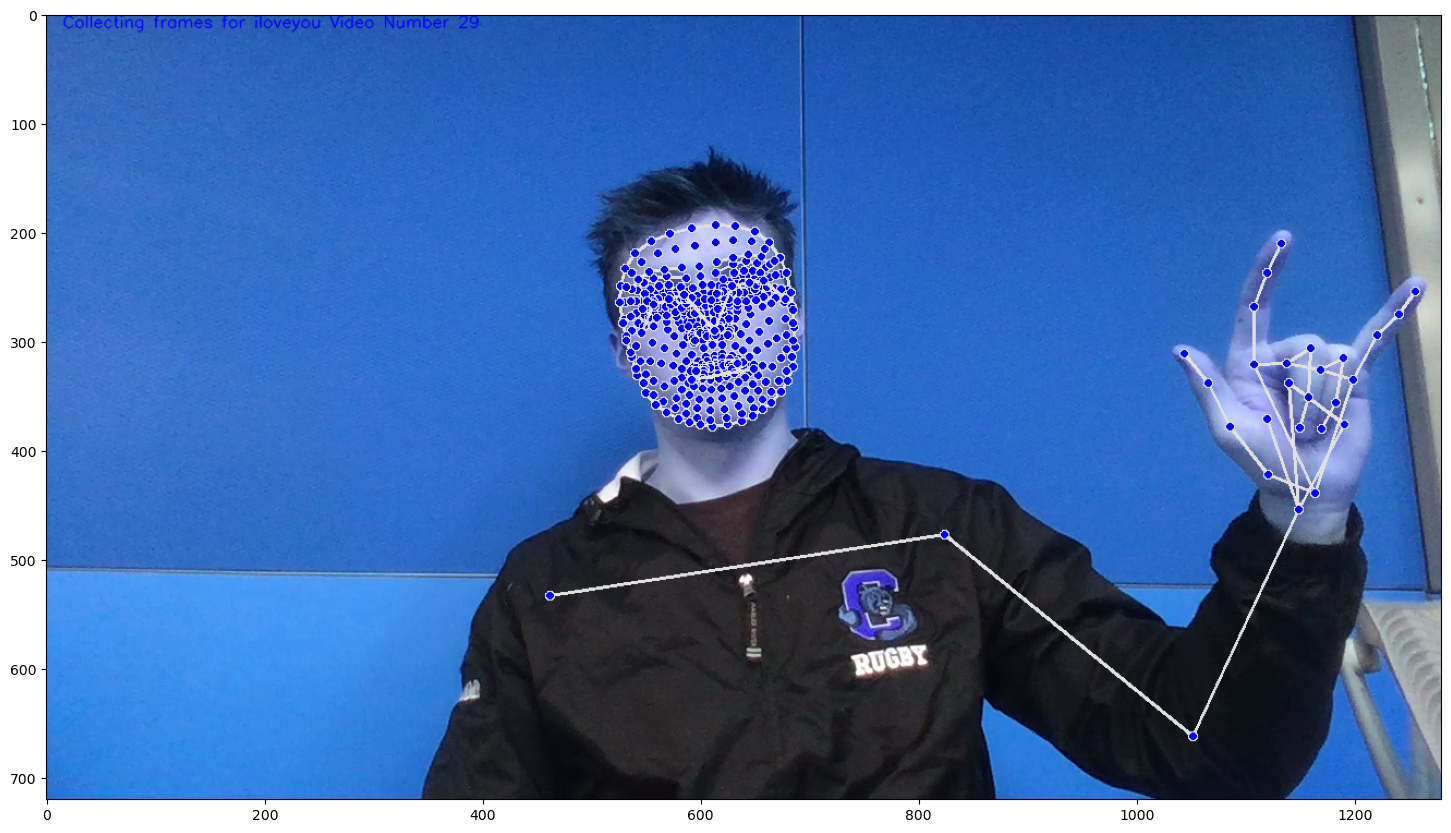

In [49]:
plt.figure(figsize=(18,18))
plt.imshow(image)

In [56]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilitiesq
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
